In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
# Learning stuff
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [2]:
nyc_health = pd.read_csv(r'C:\Users\willd\Documents\Georgia Tech\CSE6424\Project\tracts_New_York.csv')

In [3]:
nyc_health

,Unnamed: 0,StateAbbr,StateDesc,CountyName,CountyFIPS,TractFIPS,TotalPopulation,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,...,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation,zcta_x,zcta_y,food_closest_travel_times,physical_closest_dist,transport_closest_dist,education_closest_travel_times,worship_closest_travel_times
0,35389,NY,New York,Kings,36047,36047009600,6126,34.5,"(29.5, 39.2)",15.1,...,26.2,"(19.7, 32.7)",POINT (-74.00578419 40.64602128),-74.005780,40.646023,60.348103,0.158023,0.285906,37.900000,24.892878
1,35414,NY,New York,Kings,36047,36047011600,4816,28.0,"(23.5, 32.6)",16.9,...,32.2,"(25.8, 37.9)",POINT (-74.00364817 40.63587202),-74.003650,40.635870,119.790230,0.161144,0.161144,62.737150,125.259940
2,35420,NY,New York,Kings,36047,36047046000,3729,15.0,"(12.9, 17.3)",19.0,...,17.9,"(12.0, 24.8)",POINT (-73.96557391 40.6318131),-73.965576,40.631813,158.354130,0.178936,0.085636,97.572630,7.600000
3,35422,NY,New York,Bronx,36005,36005031400,1966,13.8,"(11.8, 15.9)",22.0,...,11.9,"( 8.1, 16.7)",POINT (-73.84553774 40.8615489),-73.845535,40.861550,101.600000,0.683035,0.188713,65.904180,18.100000
4,35485,NY,New York,Bronx,36005,36005042300,4100,26.7,"(22.7, 31.0)",16.9,...,18.4,"(14.0, 22.7)",POINT (-73.87732222 40.87707259),-73.877320,40.877070,148.684420,0.000343,0.283845,90.369010,120.772600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,53061,NY,New York,Queens,36081,36081113900,3322,13.9,"(11.9, 16.0)",19.7,...,12.3,"( 8.0, 17.5)",POINT (-73.79064204 40.76421748),-73.790640,40.764217,149.751680,0.129437,0.082881,102.718040,38.989790
2147,53062,NY,New York,Kings,36047,36047058000,3365,16.8,"(15.1, 18.5)",18.3,...,17.5,"(12.8, 22.6)",POINT (-73.95544864 40.59899814),-73.955450,40.599000,62.408436,0.286192,0.000097,83.171530,54.999004
2148,53068,NY,New York,New York,36061,36061013900,9257,7.6,"( 6.4, 9.4)",17.3,...,6.9,"( 4.4, 10.7)",POINT (-73.98618103 40.76729463),-73.986180,40.767296,137.177470,0.085202,0.078398,71.648735,33.882988
2149,53070,NY,New York,Queens,36081,36081041400,4033,19.8,"(16.8, 23.0)",20.3,...,23.4,"(15.8, 31.4)",POINT (-73.78072667 40.69965768),-73.780720,40.699657,89.642090,0.178249,0.082825,3.700000,18.997734


In [4]:
nyc_health.columns

Index(['Unnamed: 0', 'StateAbbr', 'StateDesc', 'CountyName', 'CountyFIPS',
       'TractFIPS', 'TotalPopulation', 'ACCESS2_CrudePrev',
       'ACCESS2_Crude95CI', 'ARTHRITIS_CrudePrev', 'ARTHRITIS_Crude95CI',
       'BINGE_CrudePrev', 'BINGE_Crude95CI', 'BPHIGH_CrudePrev',
       'BPHIGH_Crude95CI', 'BPMED_CrudePrev', 'BPMED_Crude95CI',
       'CANCER_CrudePrev', 'CANCER_Crude95CI', 'CASTHMA_CrudePrev',
       'CASTHMA_Crude95CI', 'CERVICAL_CrudePrev', 'CERVICAL_Crude95CI',
       'CHD_CrudePrev', 'CHD_Crude95CI', 'CHECKUP_CrudePrev',
       'CHECKUP_Crude95CI', 'CHOLSCREEN_CrudePrev', 'CHOLSCREEN_Crude95CI',
       'COLON_SCREEN_CrudePrev', 'COLON_SCREEN_Crude95CI', 'COPD_CrudePrev',
       'COPD_Crude95CI', 'COREM_CrudePrev', 'COREM_Crude95CI',
       'COREW_CrudePrev', 'COREW_Crude95CI', 'CSMOKING_CrudePrev',
       'CSMOKING_Crude95CI', 'DENTAL_CrudePrev', 'DENTAL_Crude95CI',
       'DEPRESSION_CrudePrev', 'DEPRESSION_Crude95CI', 'DIABETES_CrudePrev',
       'DIABETES_Crude95CI', '

In [6]:
# Get the features
X = nyc_health[['education_closest_travel_times', 'food_closest_travel_times', 'worship_closest_travel_times', 'physical_closest_dist', 'transport_closest_dist']].to_numpy()
ys = {k: nyc_health[k].to_numpy() for k in nyc_health.columns if k.endswith('_CrudePrev')}

In [7]:
remove = pd.isnull(X).any(axis=1)
xs = {}
x_trains, x_tests, y_trains, y_tests = {}, {}, {}, {}
for k, v in ys.items():
    remove1 = pd.isnull(v)
    xs[k] = X[~(remove | remove1)]
    ys[k] = v[~(remove | remove1)]
    x_train, x_test, y_train, y_test = train_test_split(xs[k], ys[k], test_size=0.2)
    x_trains[k] = x_train
    y_trains[k] = y_train
    x_tests[k] = x_test
    y_tests[k] = y_test

In [8]:
unscaled_linear = {}
unscaled_elastic = {}
for k, v in x_trains.items():
    model = LinearRegression()
    model.fit(v, y_trains[k])
    unscaled_linear[k] = model
    model = ElasticNet()
    model.fit(v, y_trains[k])
    unscaled_elastic[k] = model

In [9]:
# Scale the data
for k, v in x_trains.items():
    s_scaler = StandardScaler()
    x_trains[k] = s_scaler.fit_transform(v.astype(float))
    x_tests[k] = s_scaler.transform(x_tests[k].astype(float))

In [10]:
scaled_linear = {}
scaled_elastic = {}
for k, v in x_trains.items():
    model = LinearRegression()
    model.fit(v, y_trains[k])
    scaled_linear[k] = model
    model = ElasticNet()
    model.fit(v, y_trains[k])
    scaled_elastic[k] = model

In [11]:
models = {}
for k, v in x_trains.items():
# Basic dense model
    model = Sequential()
    model.add(Dense(5*8, activation='relu'))
    model.add(Dense(5*4, activation='relu'))
    model.add(Dense(5*2, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='Adam', loss='mse')
    models[k] = model

In [12]:
# Fit the model
for k, model in tqdm(models.items()):
    model.fit(x=x_trains[k], y=y_trains[k],
          validation_data=(x_tests[k], y_tests[k]),
          batch_size=128, epochs=300, verbose=0)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [16:54<00:00, 33.82s/it]


ACCESS2_CrudePrev : 3260.205284138441


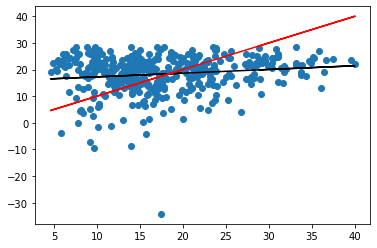

ARTHRITIS_CrudePrev : 1703.5634512273512


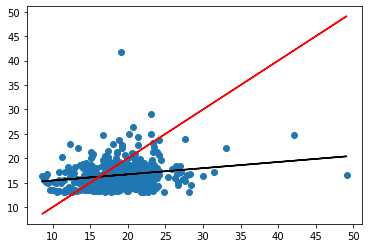

BINGE_CrudePrev : 1724.6695448915343


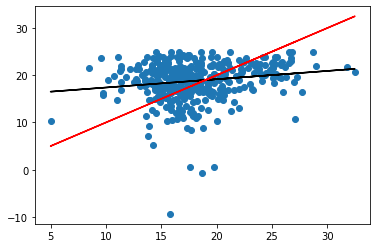

BPHIGH_CrudePrev : 2109.6430496135395


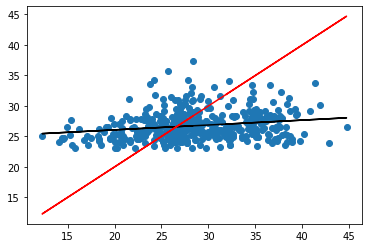

BPMED_CrudePrev : 2617.866176738067


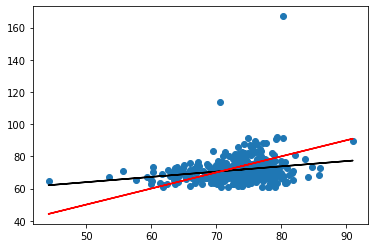

CANCER_CrudePrev : 722.6257574988007


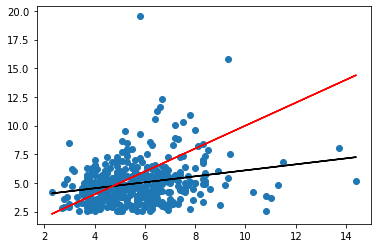

CASTHMA_CrudePrev : 696.2215116061819


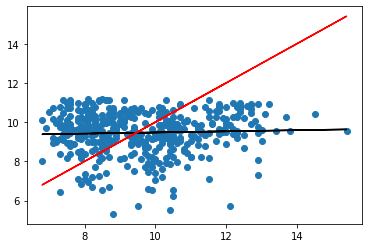

CERVICAL_CrudePrev : 1745.2098332944975


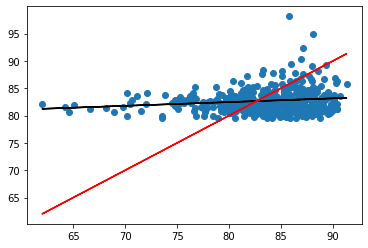

CHD_CrudePrev : 488.44925881932244


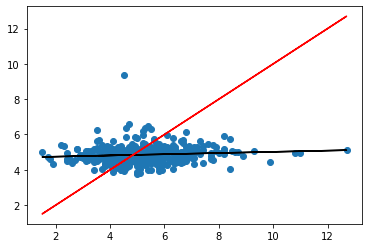

CHECKUP_CrudePrev : 1764.6959661020899


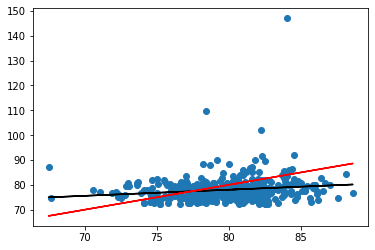

CHOLSCREEN_CrudePrev : 1630.1825963393128


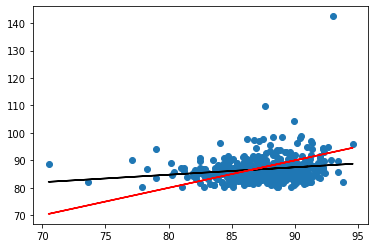

COLON_SCREEN_CrudePrev : 2653.555950266422


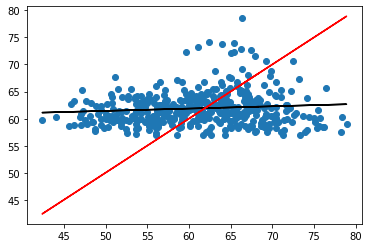

COPD_CrudePrev : 604.2862216385226


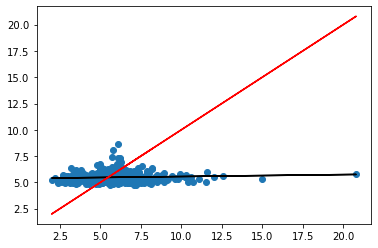

COREM_CrudePrev : 1777.6670810278733


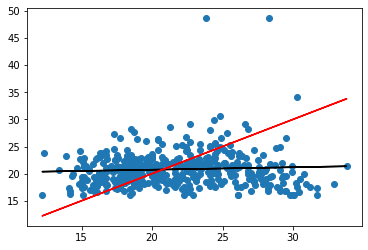

COREW_CrudePrev : 1366.876857403092


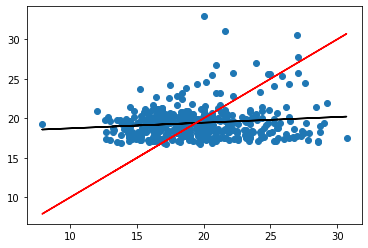

CSMOKING_CrudePrev : 1403.881092182255


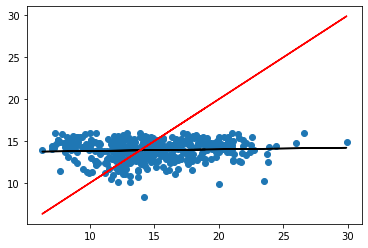

DENTAL_CrudePrev : 4079.8648009326616


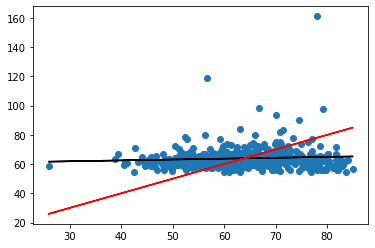

DEPRESSION_CrudePrev : 967.4332103551819


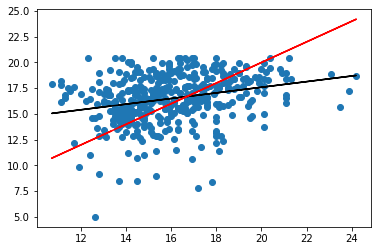

DIABETES_CrudePrev : 1298.7454231942684


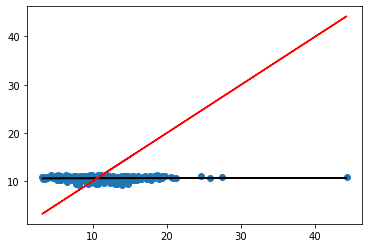

GHLTH_CrudePrev : 3032.8977238687744


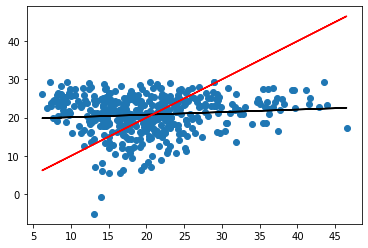

HIGHCHOL_CrudePrev : 1428.459367515738


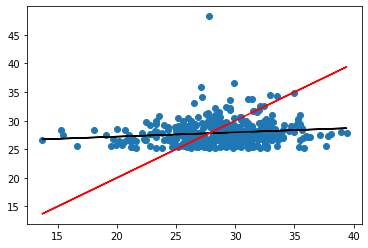

KIDNEY_CrudePrev : 304.0277436895673


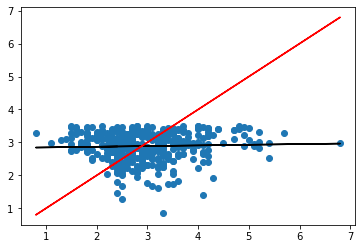

LPA_CrudePrev : 3084.362403070354


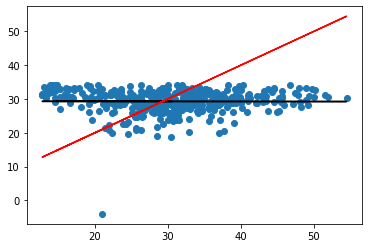

MAMMOUSE_CrudePrev : 1242.4874036379856


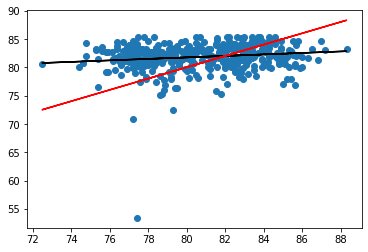

MHLTH_CrudePrev : 1244.3484577940862


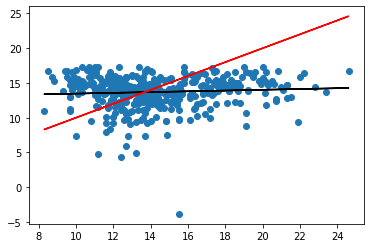

OBESITY_CrudePrev : 2466.9396285551093


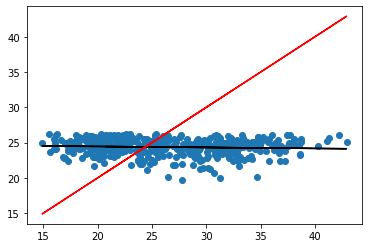

PHLTH_CrudePrev : 1307.5103183625315


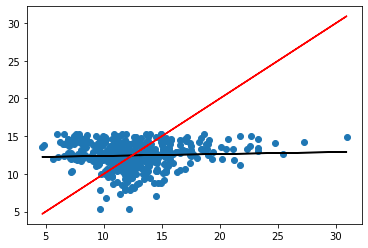

SLEEP_CrudePrev : 1814.1573945779196


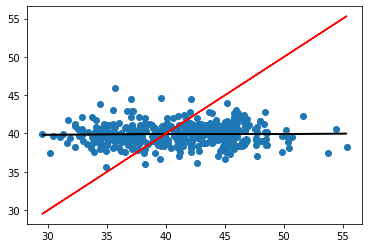

STROKE_CrudePrev : 369.65690966376667


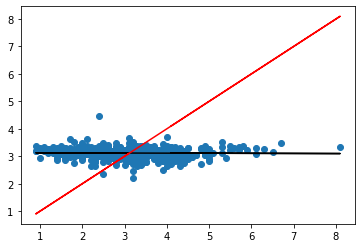

TEETHLOST_CrudePrev : 2587.7729286820836


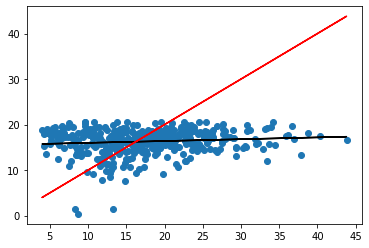

In [13]:
for k, model in unscaled_linear.items():
    y_pred = model.predict(x_tests[k])
    slope, intercept, r_value, p_value, std_err = linregress(y_tests[k], y_pred.flatten())
    print(k, ':', np.sum(np.abs(y_pred - y_tests[k])))
    plt.scatter(y_tests[k], y_pred)
    plt.plot(y_tests[k], slope*y_tests[k]+intercept, 'k')
    plt.plot(y_tests[k], y_tests[k], 'r')
    plt.show()

ACCESS2_CrudePrev : 2587.887805109667


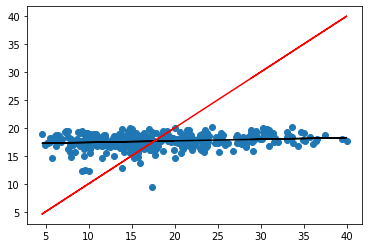

ARTHRITIS_CrudePrev : 1332.7919307136003


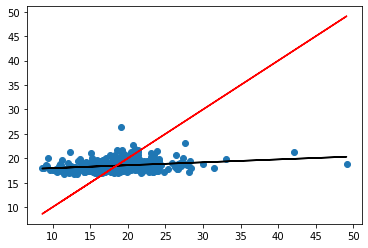

BINGE_CrudePrev : 1213.3242164799578


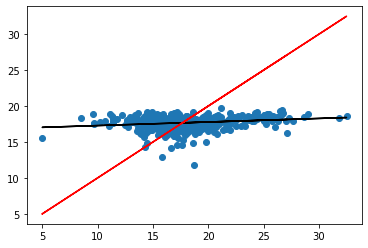

BPHIGH_CrudePrev : 1897.0787125940064


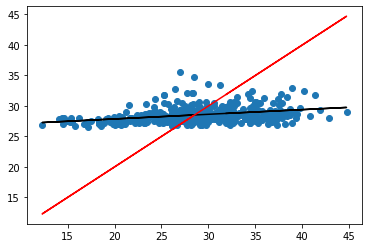

BPMED_CrudePrev : 1624.1049764579143


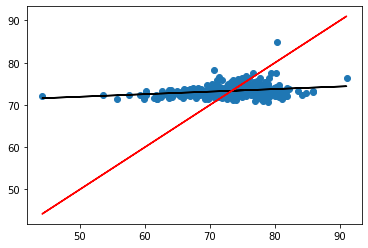

CANCER_CrudePrev : 515.0266954464803


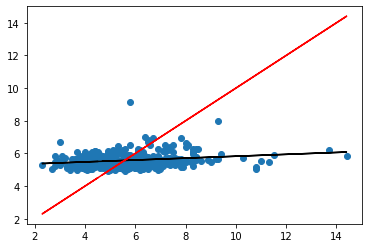

CASTHMA_CrudePrev : 587.3448761272241


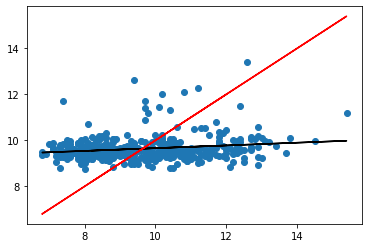

CERVICAL_CrudePrev : 1595.9322582614102


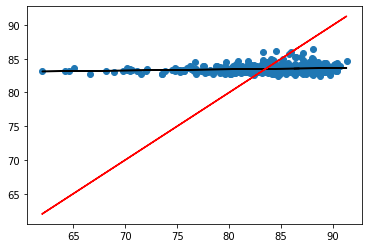

CHD_CrudePrev : 445.7330309073834


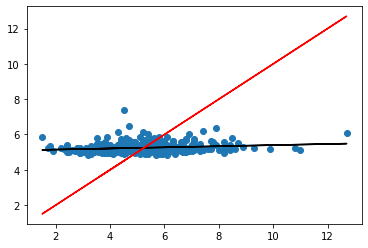

CHECKUP_CrudePrev : 1049.0470083031732


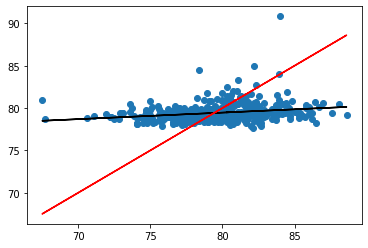

CHOLSCREEN_CrudePrev : 1017.5660228292929


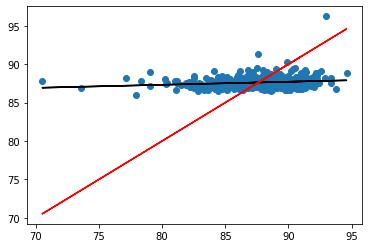

COLON_SCREEN_CrudePrev : 2547.4258016080444


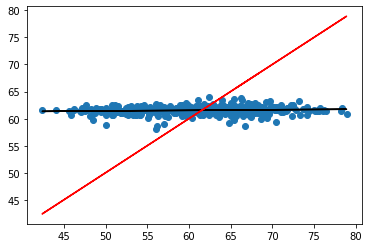

COPD_CrudePrev : 578.252576466926


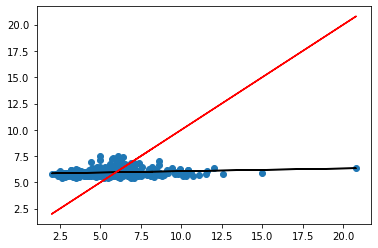

COREM_CrudePrev : 1550.3011288508337


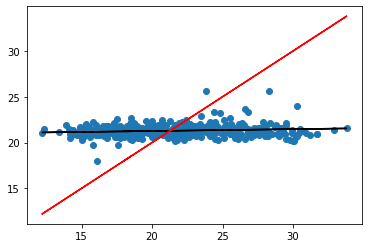

COREW_CrudePrev : 1303.2495556983645


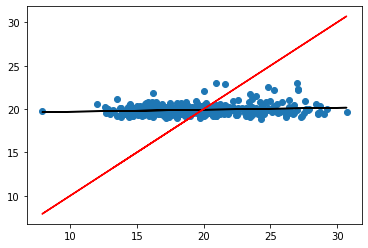

CSMOKING_CrudePrev : 1370.1343961916461


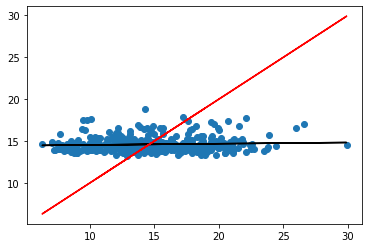

DENTAL_CrudePrev : 3548.7138836248996


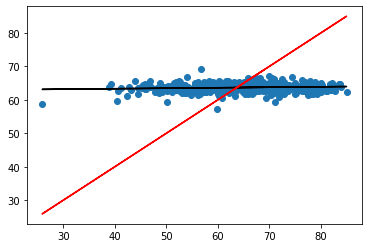

DEPRESSION_CrudePrev : 752.5722408600598


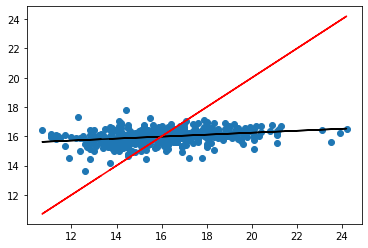

DIABETES_CrudePrev : 1242.6852892892214


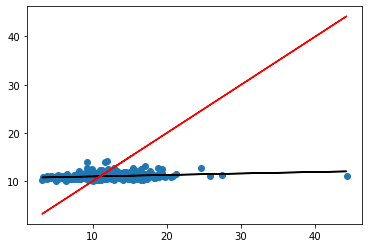

GHLTH_CrudePrev : 2583.8363748739857


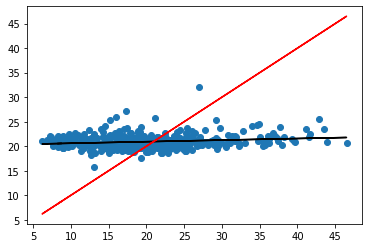

HIGHCHOL_CrudePrev : 1250.3849343168677


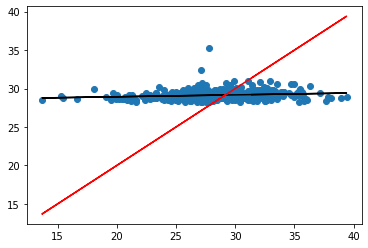

KIDNEY_CrudePrev : 269.12733805649714


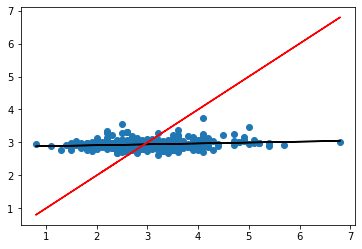

LPA_CrudePrev : 2803.7082077283185


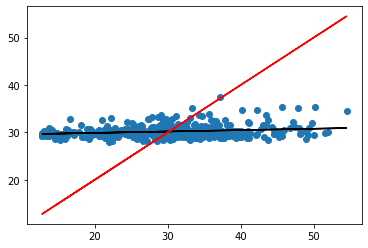

MAMMOUSE_CrudePrev : 1027.4051590144645


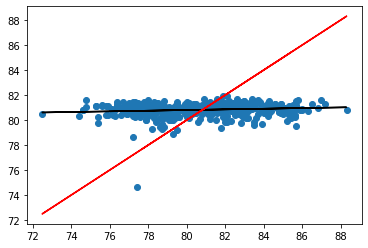

MHLTH_CrudePrev : 1001.0350374902556


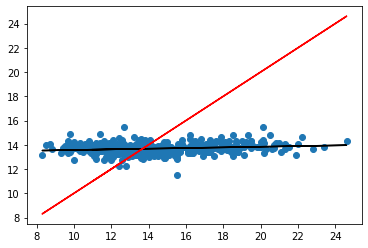

OBESITY_CrudePrev : 2183.5512658366906


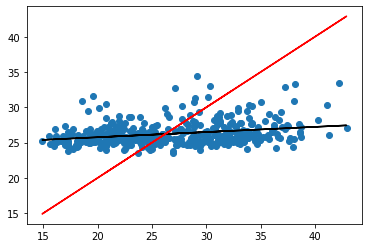

PHLTH_CrudePrev : 1154.0114123232465


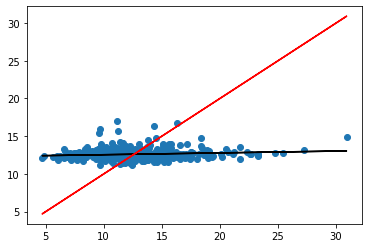

SLEEP_CrudePrev : 1677.8762492298993


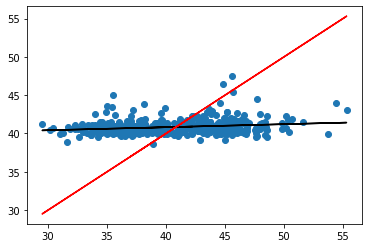

STROKE_CrudePrev : 360.7113287965009


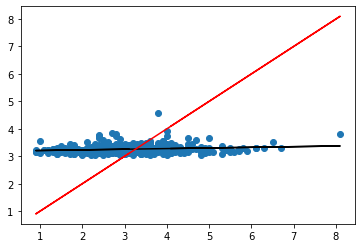

TEETHLOST_CrudePrev : 2535.1855766407143


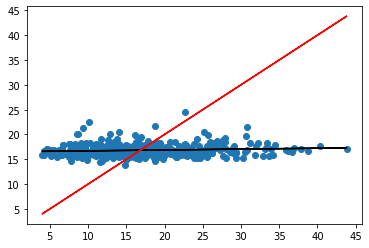

In [14]:
for k, model in scaled_linear.items():
    y_pred = model.predict(x_tests[k])
    slope, intercept, r_value, p_value, std_err = linregress(y_tests[k], y_pred.flatten())
    print(k, ':', np.sum(np.abs(y_pred - y_tests[k])))
    plt.scatter(y_tests[k], y_pred)
    plt.plot(y_tests[k], slope*y_tests[k]+intercept, 'k')
    plt.plot(y_tests[k], y_tests[k], 'r')
    plt.show()

ACCESS2_CrudePrev : 2658.896856781074


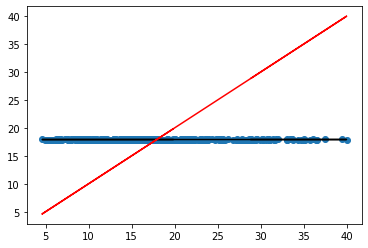

ARTHRITIS_CrudePrev : 1511.3436584147814


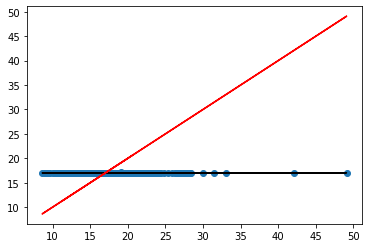

BINGE_CrudePrev : 1300.4001806431452


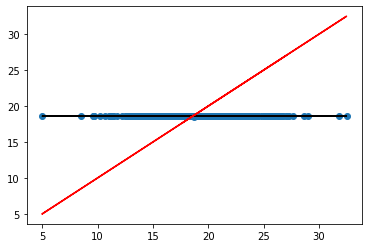

BPHIGH_CrudePrev : 2036.5220448634077


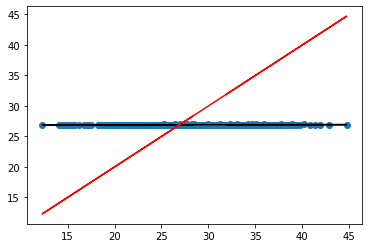

BPMED_CrudePrev : 1766.713792902037


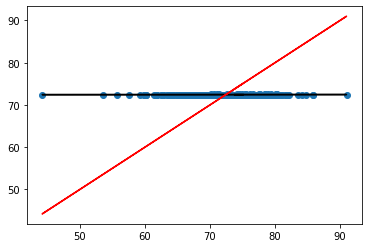

CANCER_CrudePrev : 537.5928685777104


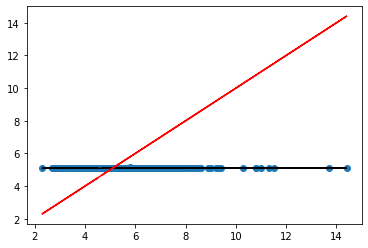

CASTHMA_CrudePrev : 589.0264482987958


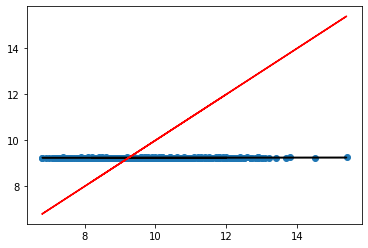

CERVICAL_CrudePrev : 1671.2331444182169


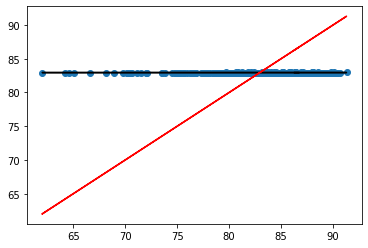

CHD_CrudePrev : 467.9340253911457


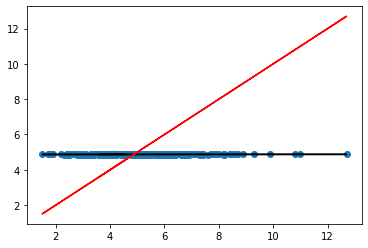

CHECKUP_CrudePrev : 1168.7090609480056


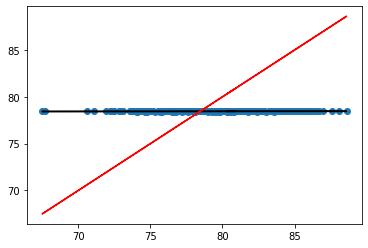

CHOLSCREEN_CrudePrev : 1032.0794526860466


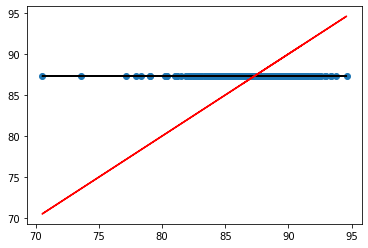

COLON_SCREEN_CrudePrev : 2557.822256103137


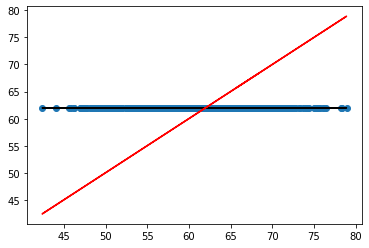

COPD_CrudePrev : 590.3178112448733


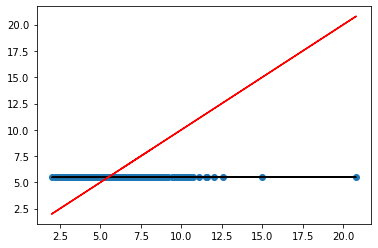

COREM_CrudePrev : 1580.6321622330438


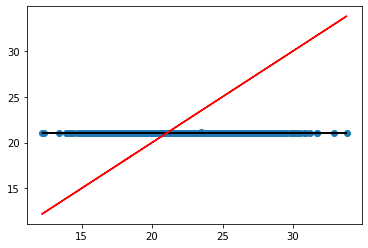

COREW_CrudePrev : 1294.884111495698


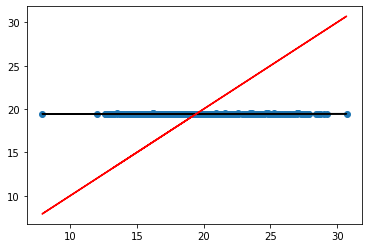

CSMOKING_CrudePrev : 1389.710811770096


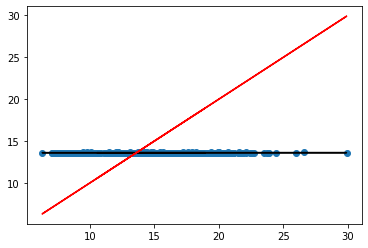

DENTAL_CrudePrev : 3586.526536958125


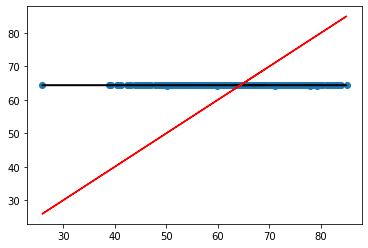

DEPRESSION_CrudePrev : 796.4396592912159


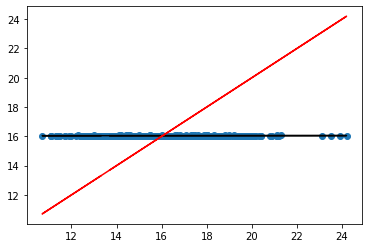

DIABETES_CrudePrev : 1296.7092763058092


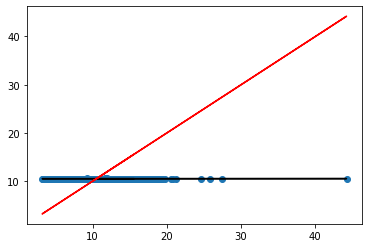

GHLTH_CrudePrev : 2566.534110783663


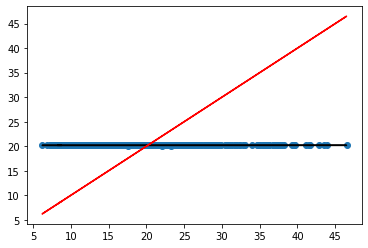

HIGHCHOL_CrudePrev : 1279.6696575928331


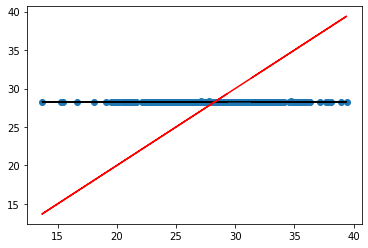

KIDNEY_CrudePrev : 269.78129844709014


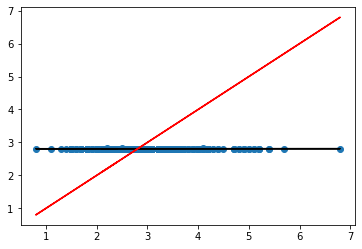

LPA_CrudePrev : 2887.9243297838275


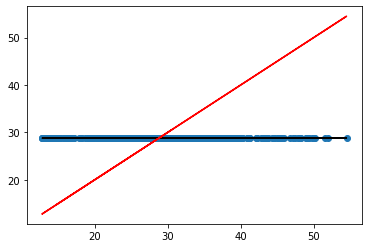

MAMMOUSE_CrudePrev : 1063.5893161038375


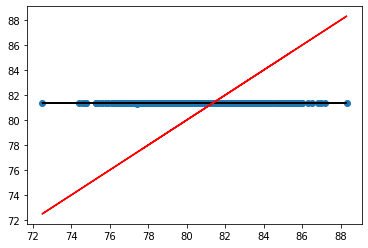

MHLTH_CrudePrev : 1010.0238173736404


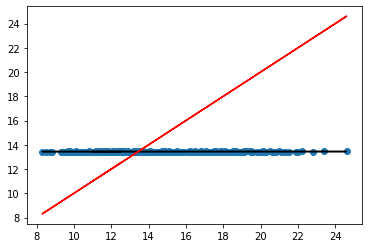

OBESITY_CrudePrev : 2378.966193251663


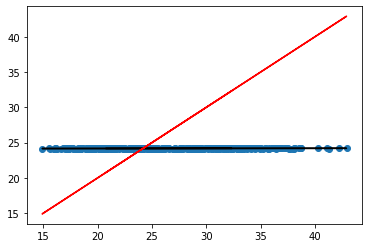

PHLTH_CrudePrev : 1128.8431407539415


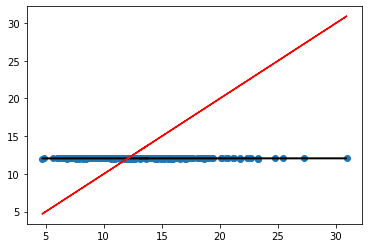

SLEEP_CrudePrev : 1774.3635134759793


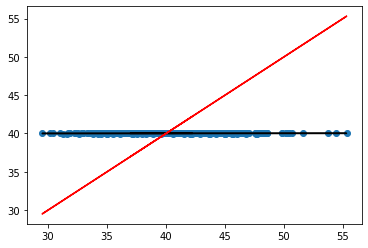

STROKE_CrudePrev : 356.6964412321655


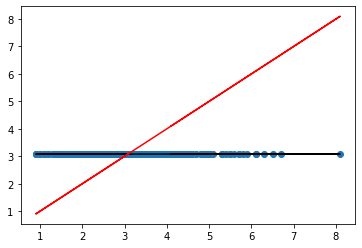

TEETHLOST_CrudePrev : 2543.853635102106


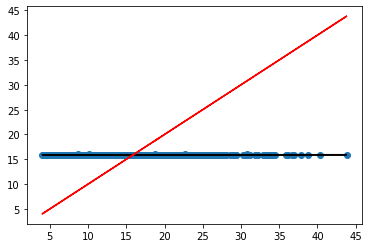

In [15]:
for k, model in unscaled_elastic.items():
    y_pred = model.predict(x_tests[k])
    slope, intercept, r_value, p_value, std_err = linregress(y_tests[k], y_pred.flatten())
    print(k, ':', np.sum(np.abs(y_pred - y_tests[k])))
    plt.scatter(y_tests[k], y_pred)
    plt.plot(y_tests[k], slope*y_tests[k]+intercept, 'k')
    plt.plot(y_tests[k], y_tests[k], 'r')
    plt.show()

ACCESS2_CrudePrev : 2632.310524720675


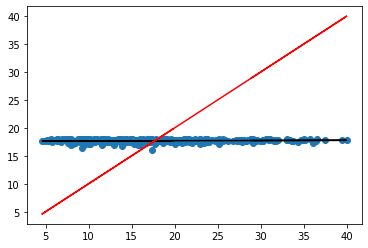

ARTHRITIS_CrudePrev : 1337.880592160208


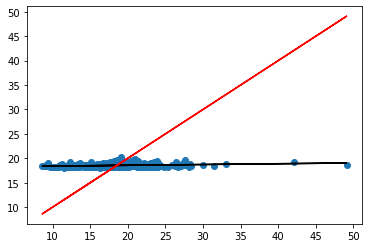

BINGE_CrudePrev : 1210.3587403274475


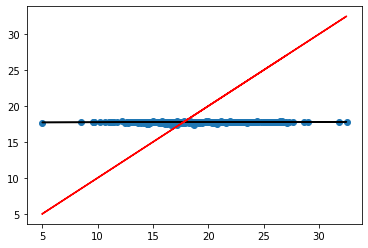

BPHIGH_CrudePrev : 1942.3756579326264


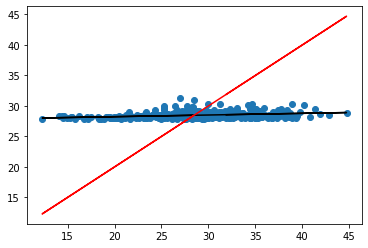

BPMED_CrudePrev : 1632.1796387853365


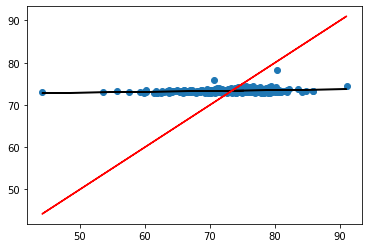

CANCER_CrudePrev : 527.4493597206053


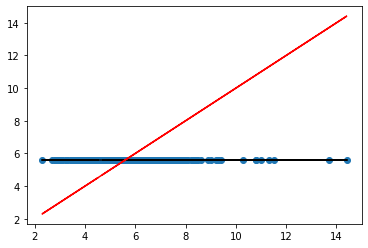

CASTHMA_CrudePrev : 591.3094295692666


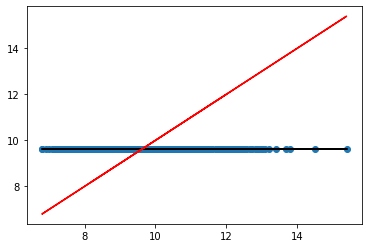

CERVICAL_CrudePrev : 1609.5818604651154


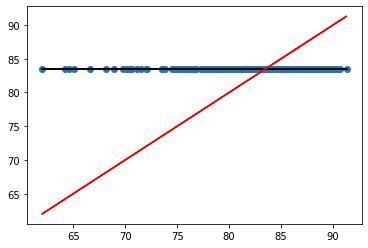

CHD_CrudePrev : 449.5969732246798


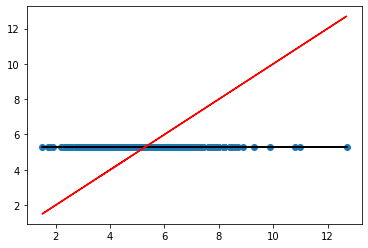

CHECKUP_CrudePrev : 1072.7085739865975


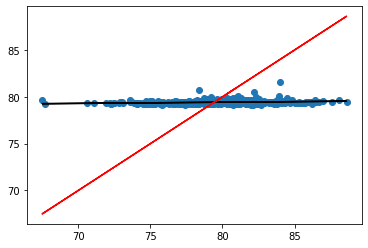

CHOLSCREEN_CrudePrev : 1025.8995343422584


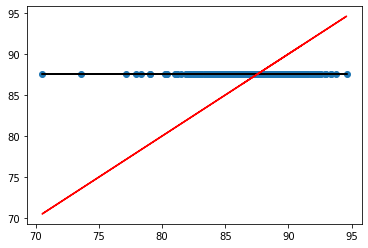

COLON_SCREEN_CrudePrev : 2561.259476744186


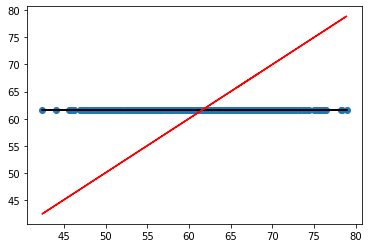

COPD_CrudePrev : 581.44924330617


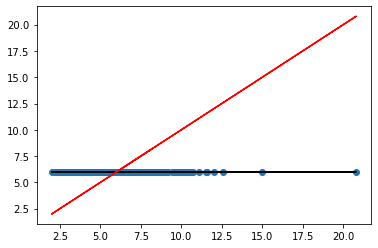

COREM_CrudePrev : 1581.3438228438229


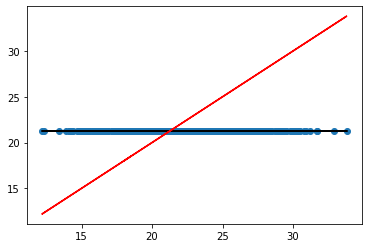

COREW_CrudePrev : 1316.159138533178


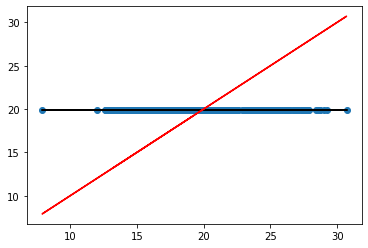

CSMOKING_CrudePrev : 1353.119307508502


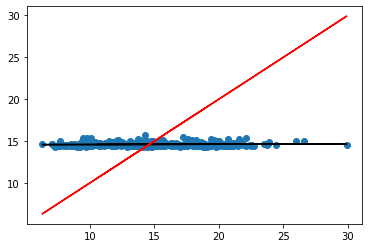

DENTAL_CrudePrev : 3576.917871422078


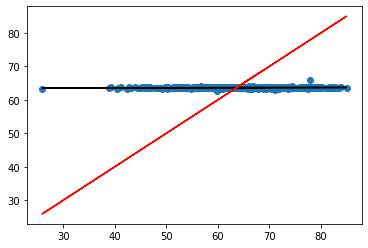

DEPRESSION_CrudePrev : 794.9520372526193


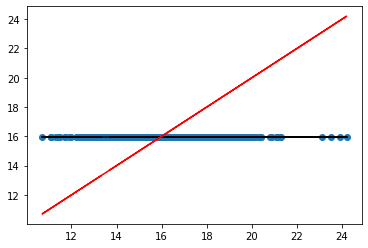

DIABETES_CrudePrev : 1268.1530849825378


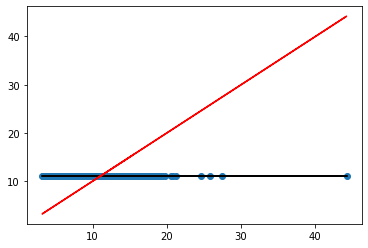

GHLTH_CrudePrev : 2603.9156749282556


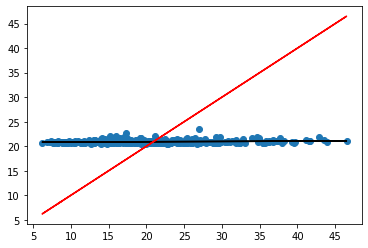

HIGHCHOL_CrudePrev : 1262.5445022708452


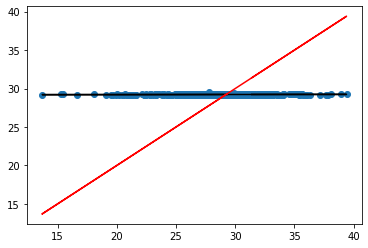

KIDNEY_CrudePrev : 271.8696158323632


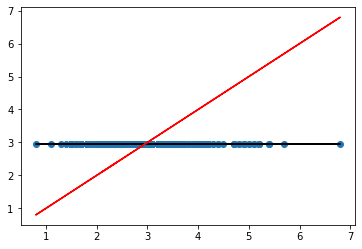

LPA_CrudePrev : 2815.486223188863


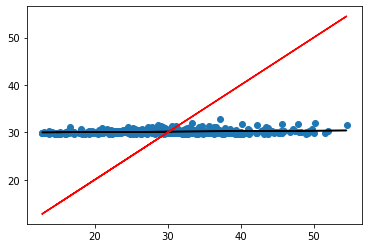

MAMMOUSE_CrudePrev : 1051.4777906976744


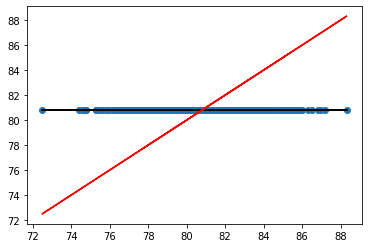

MHLTH_CrudePrev : 1008.3031431897557


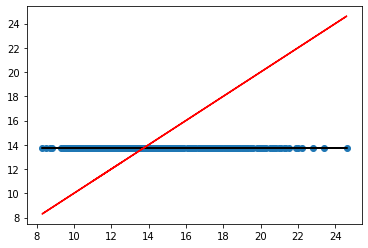

OBESITY_CrudePrev : 2204.7250134303836


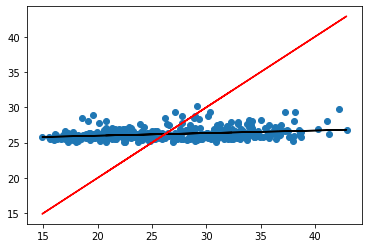

PHLTH_CrudePrev : 1137.6379975491


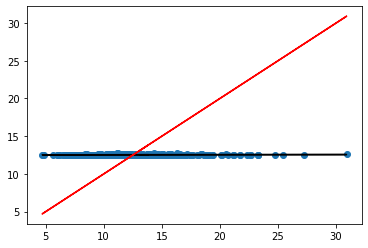

SLEEP_CrudePrev : 1718.735355137092


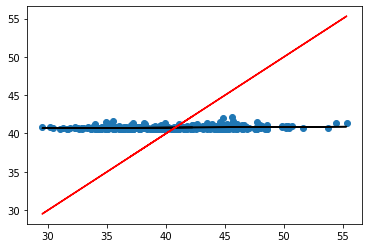

STROKE_CrudePrev : 367.8611175785797


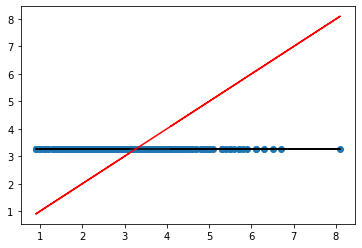

TEETHLOST_CrudePrev : 2538.7543289970445


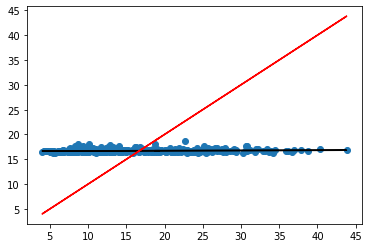

In [16]:
for k, model in scaled_elastic.items():
    y_pred = model.predict(x_tests[k])
    slope, intercept, r_value, p_value, std_err = linregress(y_tests[k], y_pred.flatten())
    print(k, ':', np.sum(np.abs(y_pred - y_tests[k])))
    plt.scatter(y_tests[k], y_pred)
    plt.plot(y_tests[k], slope*y_tests[k]+intercept, 'k')
    plt.plot(y_tests[k], y_tests[k], 'r')
    plt.show()

ACCESS2_CrudePrev : 1183047.6067504883


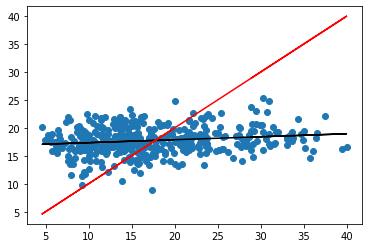

ARTHRITIS_CrudePrev : 645611.3697875976


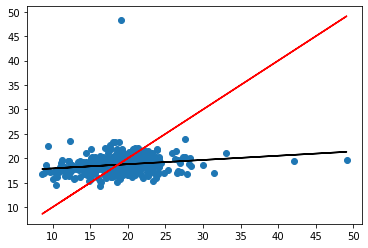

BINGE_CrudePrev : 566296.5354621888


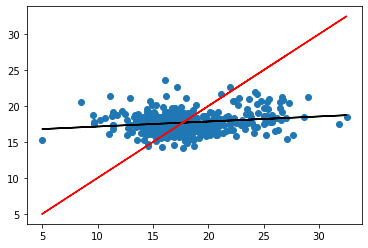

BPHIGH_CrudePrev : 922644.027355194


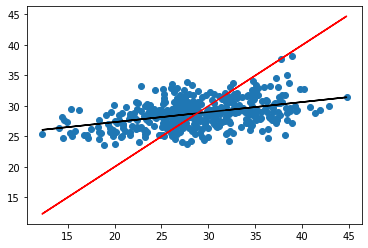

BPMED_CrudePrev : 810265.8484344482


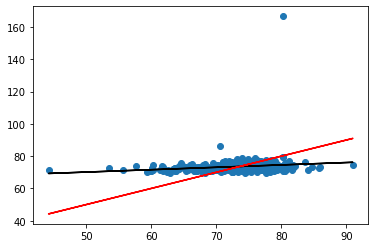

CANCER_CrudePrev : 251192.33748121263


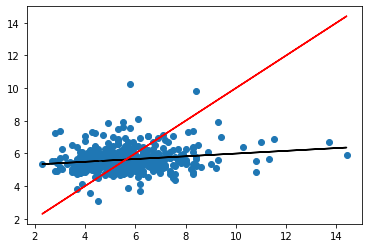

CASTHMA_CrudePrev : 270034.55061244965


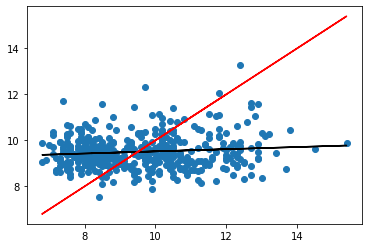

CERVICAL_CrudePrev : 742736.1632659913


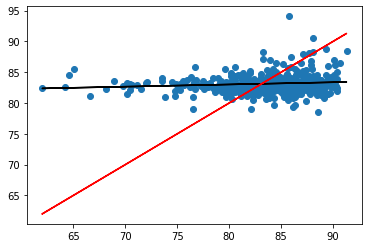

CHD_CrudePrev : 217000.03540678025


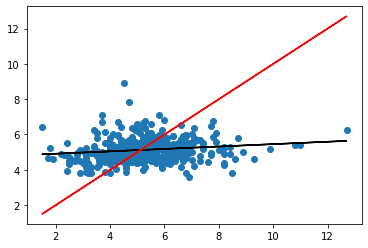

CHECKUP_CrudePrev : 544927.4226470947


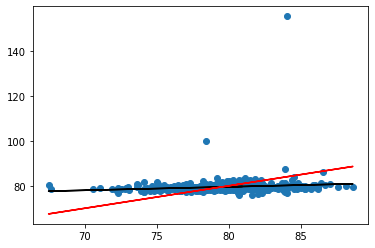

CHOLSCREEN_CrudePrev : 508639.8953308105


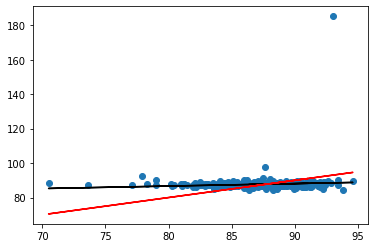

COLON_SCREEN_CrudePrev : 1139404.8199150085


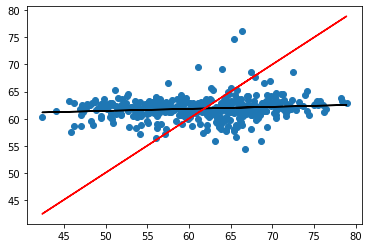

COPD_CrudePrev : 280528.3682982445


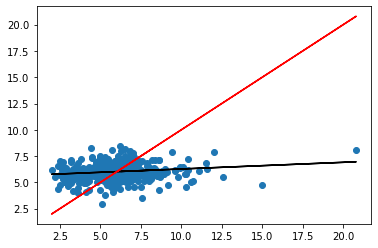

COREM_CrudePrev : 704719.4918907166


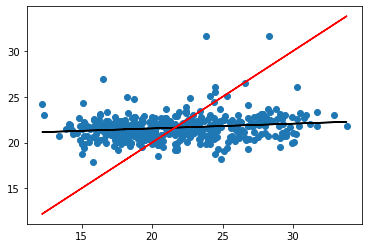

COREW_CrudePrev : 601352.7502563477


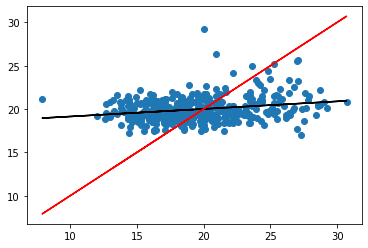

CSMOKING_CrudePrev : 631521.9355602266


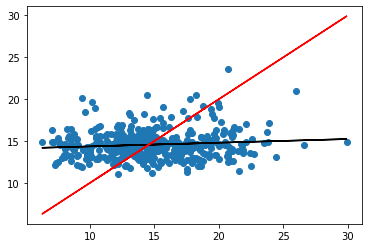

DENTAL_CrudePrev : 1641758.51219635


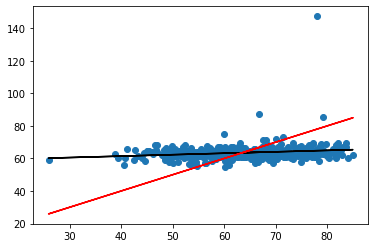

DEPRESSION_CrudePrev : 363863.5915805818


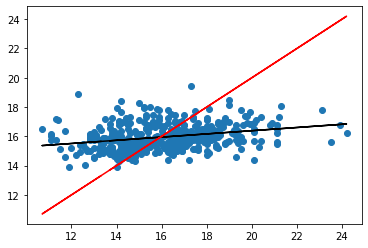

DIABETES_CrudePrev : 1403240.3423223498


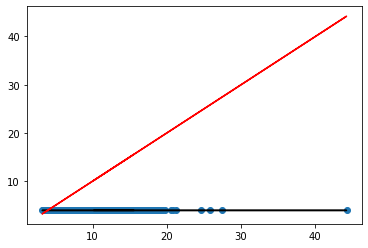

GHLTH_CrudePrev : 1181650.8068901063


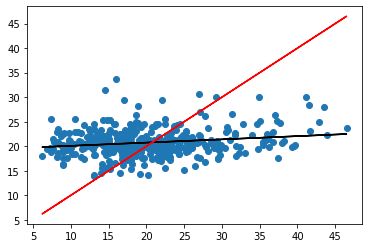

HIGHCHOL_CrudePrev : 575678.5899032593


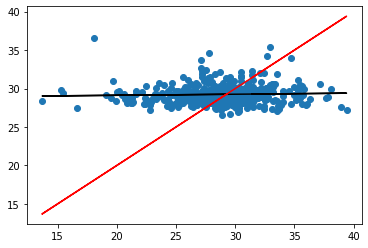

KIDNEY_CrudePrev : 128497.61374664305


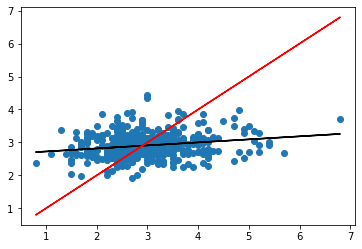

LPA_CrudePrev : 4844837.208969116


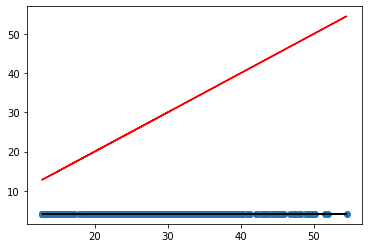

MAMMOUSE_CrudePrev : 490344.0048858642


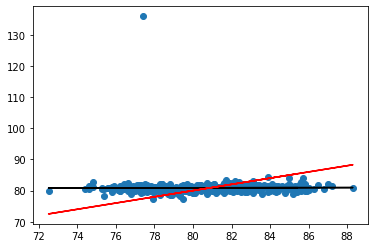

MHLTH_CrudePrev : 449980.75755462656


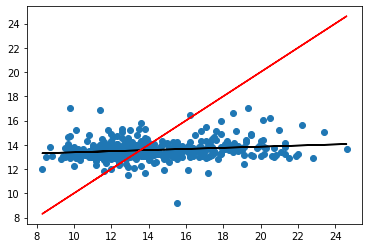

OBESITY_CrudePrev : 1030225.2221862793


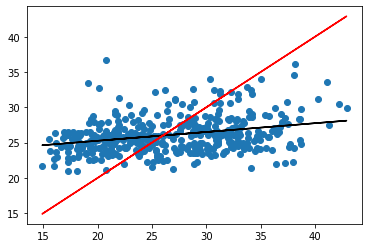

PHLTH_CrudePrev : 532927.1555404663


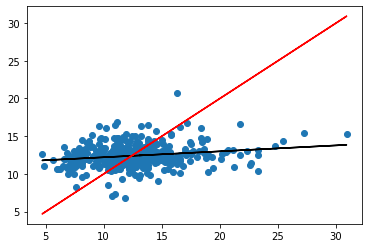

SLEEP_CrudePrev : 776505.5890037536


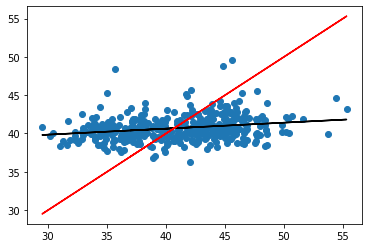

STROKE_CrudePrev : 182884.38030071257


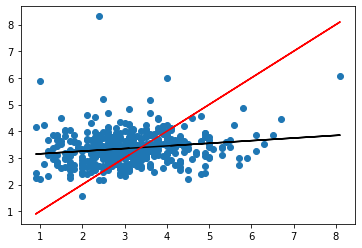

TEETHLOST_CrudePrev : 1182558.0941192629


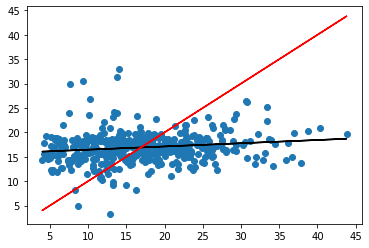

In [18]:
# Red - perfect fit; Black - actual fit
for k, model in models.items():
    y_pred = model.predict(x_tests[k])
    slope, intercept, r_value, p_value, std_err = linregress(y_tests[k], y_pred.flatten())
    print(k, ':', np.sum(np.abs(y_pred - y_tests[k])))  # Hmmm...
    plt.scatter(y_tests[k], y_pred)
    plt.plot(y_tests[k], slope*y_tests[k]+intercept, 'k')
    plt.plot(y_tests[k], y_tests[k], 'r')
    plt.show()